In [99]:
from matplotlib import pyplot as plt, numpy as np, rc
from PIL import Image, ImageOps
import os

In [100]:
font = {'family': 'Verdana',
       'weight': 'normal'}
rc('font', **font)

path = "C:\Users\user\Desktop\Lagrange"
files = os.listdir(path)
files = filter(lambda x: x.endswith('.bmp'), files)

for k in files:
    img = Image.open(path + '\\' + k)
    width = img.size[0]
    height = img.size[1]
    pix = img.load()
    
    for i in range(width):
        for j in range(height):
            a = pix[i, j][0]
            b = pix[i, j][1]
            c = pix[i, j][2]
            S = (a + b + c) // 3
            img.putpixel((i, j), (S, S, S))
     
    pix = img.load()
    
    d = []
    for i in range(width):
        d.append(pix[i, 292][0])
        
    x = np.array(range(width), dtype=float)[::92]
    y = np.array(d, dtype=float)[::92]
    
    

In [101]:
    def lagranz(x, y, t):
        z = 0
        for j in range(len(y)):
            p1=1; p2=1
            for i in range(len(x)):
                if i==j:
                    p1 = p1*1; p2 = p2*1
                else:
                    p1=p1*(t-x[i])
                    p2=p2*(x[j]-x[i])
            z=z+y[j]*p1/p2
        return z
    
    xnew=np.linspace(np.min(x), np.max(x), 220)
    ynew=[lagranz(x, y, i) for i in xnew]

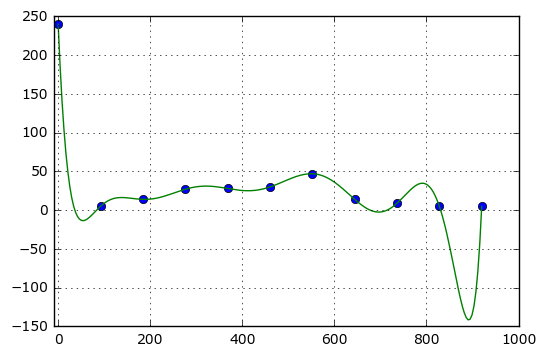

In [98]:
    plt.axis([-10, 1000, -150, 250])
    plt.grid(True)
    plt.plot(x, y, 'o', xnew, ynew)
    
    #plt.savefig((path + '\\' + k)[0:len(path + '\\' + k) - 4] + '_graph.jpg', dpi = 100)
    #plt.clf()
    
    plt.show()